# Importando as bibliotecas necessarias

In [82]:
import sys
assert sys.version_info >= (3, 5) 

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import os 

# para fazer a saída do notebook estável através de diferentes runs
np.random.seed(42)
tf.random.set_seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# Sobre o dataset MNIST

In [83]:
# Importa o dataset mnist do openml por nome, id, etc..
# 'data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'
# data = array com uma linha por instância e uma coluna por feature (70,000 digitos)
# target = array com os labels (70,000 labels). Labels são strings
# Imagens de 28x28, 784 features, um pixel por feature de 0 (branco) até 255 (preto)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y, z = mnist["data"], mnist["target"], mnist["feature_names"]
a, b, c, d = mnist["DESCR"], mnist["details"], mnist["categories"], mnist["url"]

In [84]:
x.shape

(70000, 784)

In [85]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

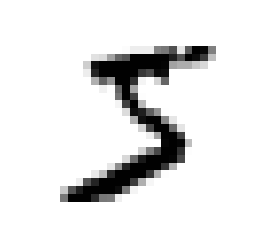

In [86]:
plt.imshow(x[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [87]:
# targets
y.shape

(70000,)

In [88]:
# targets
y[0]

'5'

In [89]:
# feature names
z

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [90]:
# description
a

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [91]:
# details
b

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [92]:
# categories
c

{}

In [93]:
# url
d

'https://www.openml.org/d/554'

# Sobre o split do dataset MNIST em treinamento, validação e teste

In [94]:
# carrega 60,000 imagens de 28x28 de 10 dígitos para treinamento e 10,000 imagens para teste
# para treinamento são 30,000 padrões SD-3 e 30,000 padrões SD-1
# para testes são 5,000 SD-3 e 5,000 SD-1
# SD-3 foi escrito por funcionários do Census Bureau e está em sequência
# SD-1 foi escrito por estudantes e não fora de ordem
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

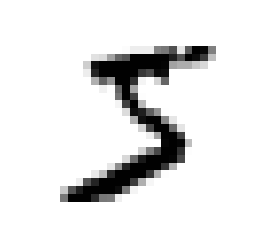

In [95]:
plt.imshow(X_train_full[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [96]:
y_train_full[0]

5

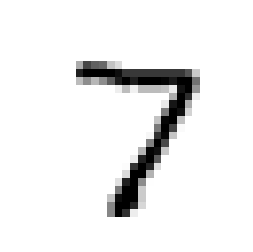

In [97]:
plt.imshow(X_test[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [98]:
y_test[0]

7

In [99]:
# é boa prática separar parte do dataset de treinamento para validação. O dataset de validação deve ter por 
# objetivo ajudar o desenvolvedor a validar o melhor modelo. Após escolha do melhor modelo, usa-se o dataset
# de treinamento para treinar o modelo e depois o dataset de teste para testar
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

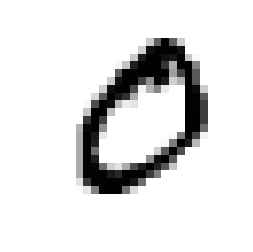

In [100]:
# dataset de treinamento com com 55,000 imagens
plt.imshow(X_train[1].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

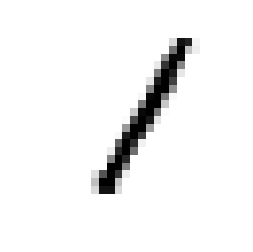

In [101]:
# dataset de treinamento com 55,000 imagens
plt.imshow(X_valid[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

In [102]:
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [103]:
y_train[0]

5

In [104]:
y_valid[0]

1

# Sobre convolução

In [258]:
import numpy as np
from sklearn.datasets import load_sample_image

# carregando imagens para teste
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape 

In [259]:
images.shape 

(2, 427, 640, 3)

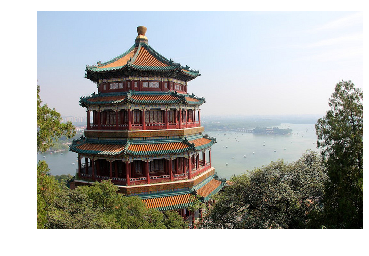

In [260]:
plt.imshow(images[0])
plt.axis("off")
plt.show()

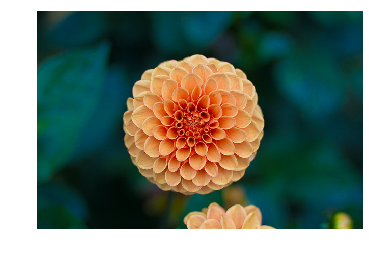

In [108]:
plt.imshow(images[1])
plt.axis("off")
plt.show()

In [109]:
# criando filtros: receptive field 7x7, para 3 canais e 2 imagens
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [110]:
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [111]:
filters[:, 3, :, 0] = 1  # filtro vertical
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [112]:
filters[3, :, :, 1] = 1  # horizontal line
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [113]:
# tf chama uma fç de rede neural convolucional que recebe as imagens (china e flower)
# e aplica os filtros, o stride e o padding
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") 

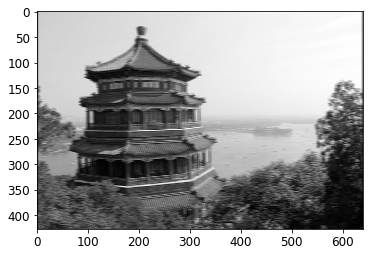

In [114]:
# plot 1st image's 2nd feature map 
plt.imshow(outputs[0, :, :, 1], cmap="gray")

In [115]:
def crop(images):
    return images[150:220, 130:250]

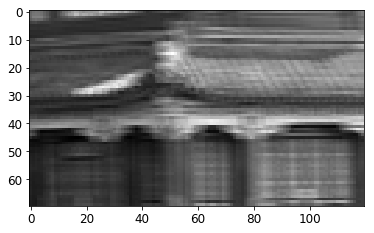

In [116]:
plt.imshow(crop(outputs[0, :, :, 1]), cmap = "gray")

# Software para o Projeto Final de Programacao

## Split do dataset MNIST

In [117]:
# carregar dataset mnist, e fazer split em dataset de treinamento e validacao
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# metricas necessarias a camada de batch normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std # quantidade de desvios padrão da média
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# newaxis é utilizado para aumentar a dimensão de um array
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

## Criando a arquitetura ResNet-34

In [118]:
# Funcao partial permite derivar uma função com "x" parâmetros para uma função com menos parâmetros 
# e fixa os valores definidos para a função mais limitada.
from functools import partial

In [119]:
# ResNet-34 é uma rede com 34 camadas (34 contanto apenas as camadas convolucionais e as camadas totalmente
# conectadas) contendo 3 residual units que geram 64 feature maps, 4 RUs que geram 128 maps, 
# 6 RUs com 256 maps e 3 RUs com 512 maps.

# definindo a estrutura da camada convolucional
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

# definindo a classe ResUnit
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides), # Conv, 128 filtros, 3x3, stride 2, S
            keras.layers.BatchNormalization(),       # Batch normalization + RELU
            self.activation,
            DefaultConv2D(filters),                  # Conv, 128 filtros, 3x3, stride 1, S
            keras.layers.BatchNormalization()]       # Batch normalization
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides), # Conv, 128 filtros, 1x1, stride 2, S
                keras.layers.BatchNormalization()]

# No metodo call(), fazemos com que as entradas atravessem as camadas principais e as camadas skip,
# para depois adicionarmos as saídas das camadas principais e skip à função de ativação.

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [120]:
# criacao da arquitetura 
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))   # adiciona a RU como se fosse uma unica camada
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())               # calcula a média de cada feature map
model.add(keras.layers.Flatten())           # camada de pre-processamento para converter cada entrada em um array 1D
model.add(keras.layers.Dense(10, activation="softmax")) # camada totalmente conectada com função de ativação softmax

In [121]:
# resumo do modelo criado 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization_36 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit_16 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_17 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_18 (ResidualUn (None, 7, 7, 64)         

## Etapa de treinamento

In [122]:
# configura o modelo com os loss e a métrica de acuracia
# X_train = input data; y_train = target data; epochs = numero de iterações; 
# validation_data = dados aonde serão avaliados o loss e a acurácia, ao final de cada epoch

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3994s 2s/step - loss: 0.2039 - accuracy: 0.9447 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 2/10
1719/1719 [==============================] - 3975s 2s/step - loss: 0.0930 - accuracy: 0.9747 - val_loss: 0.0725 - val_accuracy: 0.9814
Epoch 3/10
1719/1719 [==============================] - 3958s 2s/step - loss: 0.0650 - accuracy: 0.9819 - val_loss: 0.0552 - val_accuracy: 0.9832
Epoch 4/10
1719/1719 [==============================] - 3934s 2s/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 5/10
1719/1719 [==============================] - 3953s 2s/step - loss: 0.0447 - accuracy: 0.9873 - val_loss: 0.0737 - val_accuracy: 0.9782
Epoch 6/10
1719/1719 [==============================] - 3959s 2s/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.0375 - val_accuracy: 0.9910
Epoch 7/10
1719/1719 [==============================] - 3952s 2s/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0453 -

## Avaliacao do modelo usando as 10,000 imagens do dataset de teste

In [125]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 22s 70ms/step - loss: 1140.7450 - accuracy: 0.9862


## Teste usando 10 imagens do dataset de teste

In [491]:
# imaginemos uma nova entrada
X_new = X_test[:10] 

In [492]:
X_new.shape

(10, 28, 28, 1)

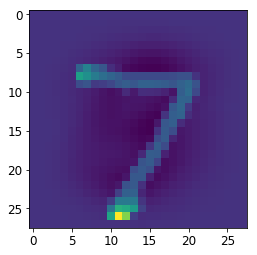

In [493]:
plt.imshow(X_new[0].reshape(28,28))

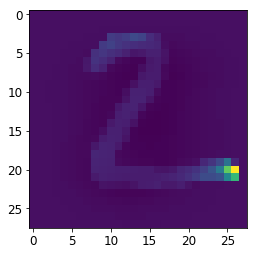

In [494]:
plt.imshow(X_new[1].reshape(28,28))

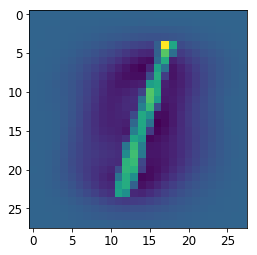

In [495]:
plt.imshow(X_new[2].reshape(28,28))

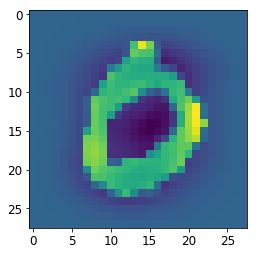

In [507]:
plt.imshow(X_new[3].reshape(28,28))

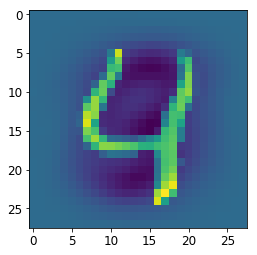

In [508]:
plt.imshow(X_new[4].reshape(28,28))

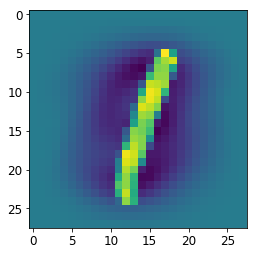

In [509]:
plt.imshow(X_new[5].reshape(28,28))

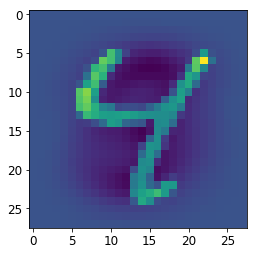

In [510]:
plt.imshow(X_new[6].reshape(28,28))

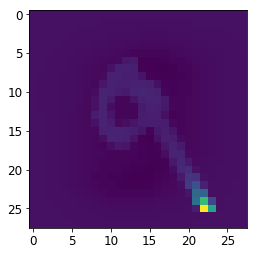

In [511]:
plt.imshow(X_new[7].reshape(28,28))

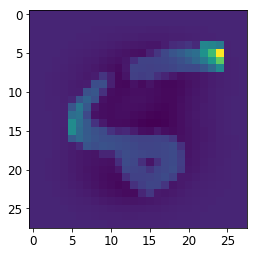

In [513]:
plt.imshow(X_new[8].reshape(28,28))

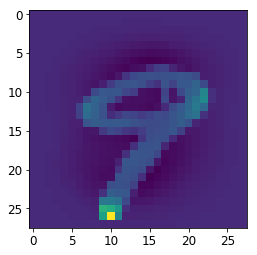

In [514]:
plt.imshow(X_new[9].reshape(28,28))

In [496]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [497]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [498]:
np.round(model.predict(X_new))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [499]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [500]:
y_pred.shape

(10,)

In [501]:
y_pred[0]

7

In [502]:
y_pred[1]

2

In [503]:
y_pred[2]

1

## Resultado do modelo com 10 imagens de teste

In [515]:
score = model.evaluate(X_new, np.array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

1/1 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000


## Nova imagem de teste gerada pelo usuario

In [397]:
from tensorflow.keras.preprocessing import image

In [470]:
num0 = image.load_img('Imagem_n0_crop.png', color_mode="grayscale", target_size=(28,28))
num1 = image.load_img('Imagem_n1_crop.png', color_mode="grayscale", target_size=(28,28))
num2 = image.load_img('Imagem_n2_crop.png', color_mode="grayscale", target_size=(28,28))
num3 = image.load_img('Imagem_n3_crop.png', color_mode="grayscale", target_size=(28,28))
num4 = image.load_img('Imagem_n4_crop.png', color_mode="grayscale", target_size=(28,28))
num5 = image.load_img('Imagem_n5_crop.png', color_mode="grayscale", target_size=(28,28))
num6 = image.load_img('Imagem_n6_crop.png', color_mode="grayscale", target_size=(28,28))
num7 = image.load_img('Imagem_n7_crop.png', color_mode="grayscale", target_size=(28,28))
num8 = image.load_img('Imagem_n8_crop.png', color_mode="grayscale", target_size=(28,28))
num9 = image.load_img('Imagem_n9_crop.png', color_mode="grayscale", target_size=(28,28))

In [471]:
from tensorflow.keras.preprocessing.image import img_to_array

In [472]:
num0_array = img_to_array(num0) / 255
num1_array = img_to_array(num1) / 255
num2_array = img_to_array(num2) / 255
num3_array = img_to_array(num3) / 255
num4_array = img_to_array(num4) / 255
num5_array = img_to_array(num5) / 255
num6_array = img_to_array(num6) / 255
num7_array = img_to_array(num7) / 255
num8_array = img_to_array(num8) / 255
num9_array = img_to_array(num9) / 255

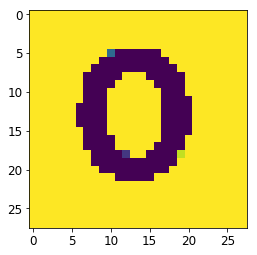

In [473]:
plt.imshow(num0_array.reshape(28,28))

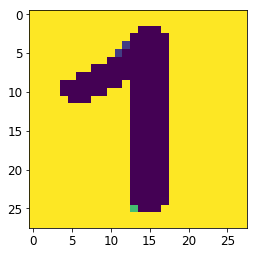

In [474]:
plt.imshow(num1_array.reshape(28,28))

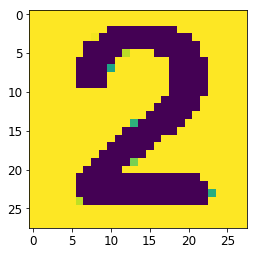

In [475]:
plt.imshow(num2_array.reshape(28,28))

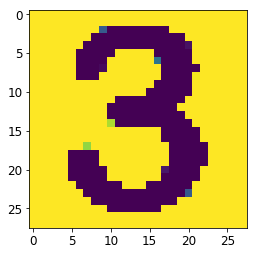

In [476]:
plt.imshow(num3_array.reshape(28,28))

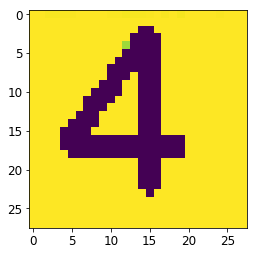

In [477]:
plt.imshow(num4_array.reshape(28,28))

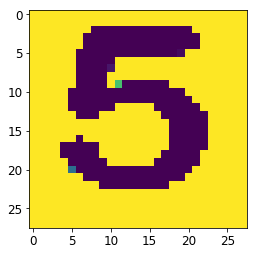

In [478]:
plt.imshow(num5_array.reshape(28,28))

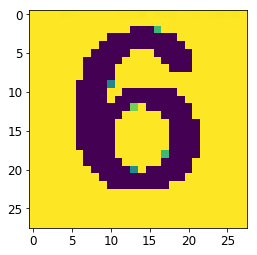

In [479]:
plt.imshow(num6_array.reshape(28,28))

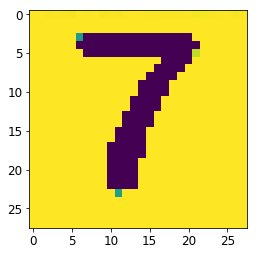

In [480]:
plt.imshow(num7_array.reshape(28,28))

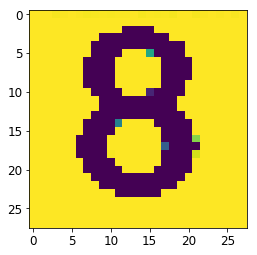

In [481]:
plt.imshow(num8_array.reshape(28,28))

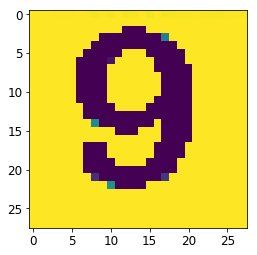

In [482]:
plt.imshow(num9_array.reshape(28,28))

In [533]:
digitos_10 = np.array([num0_array,num1_array,num2_array,num3_array,num4_array,num5_array,
                    num6_array,num7_array,num8_array,num9_array])

In [534]:
digitos_10.shape

(10, 28, 28, 1)

In [535]:
digitos_10_pred = np.argmax(model.predict(digitos_10), axis=-1)

### 4 digitos foram previstos de maneira correta, foram eles: 1, 5, 8 e 9. Provavelmente a distribuicao das imagens geradas para este novo teste nao eh a mesma que a utilizada no dataset MNIST.

In [536]:
digitos_10_pred

array([1, 1, 1, 8, 3, 5, 8, 0, 8, 9])

In [537]:
score_digitos = model.evaluate(digitos_10, np.array([0,1,2,3,4,5,6,7,8,9]))

1/1 [==============================] - 0s 1ms/step - loss: 2.6219 - accuracy: 0.4000
